In [1]:
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt
from ipywidgets import *
import numpy as np
from com.sbk.dspbase.signals.sinus import Sinus


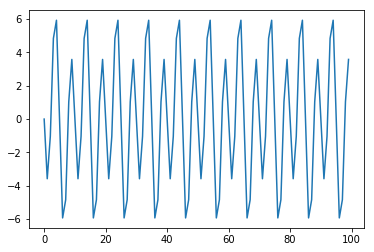

interactive(children=(IntSlider(value=2, description='a1', max=6, min=-2), IntSlider(value=10, description='f1…

<function __main__.update>

In [2]:
sample_rate = 100
x = Sinus.build_sin_waves(sample_rate, 2, 10, 5, 80)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(Sinus.build_sin_waves(sample_rate, 2, 10, 5, 80))


def update(a1=2, f1=10, a2=5, f2=80):
    x = Sinus.build_sin_waves(sample_rate, a1, f1, a2, f2)
    line.set_ydata(Sinus.build_sin_waves(sample_rate, a1, f1, a2, f2))
    fig.canvas.draw()


interact(update)
